# PIA.- Entrenamiento de una red neuronal convolucional.
# EQUIPO 6

HORA CLASE: MARTES N4, N5, N6

Integrantes:

Jared Jesus Diaz Juarez 2077828

Rolando Vera Domínguez 2005010

Maria Fernanda Campos Carrazco 2015715

Alberto Gómez Vázquez 1996158

In [2]:
# Cargar librerías
import os
import random
import shutil
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

In [5]:
# Montar Google Drive
drive.mount('/content/drive')

# Función para seleccionar y descomprimir el archivo ZIP
def select_zip_file():
    zip_file = '/content/drive/MyDrive/animales.zip'
    extract_folder = "dataset"
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)
    folders = os.listdir(extract_folder)
    print("Archivos descomprimidos correctamente.")
    return extract_folder, folders

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Paso 1: Seleccionar y descomprimir el archivo ZIP
extract_folder, folders = select_zip_file()

if extract_folder and folders:
    # Paso 2: Dividir el conjunto de datos en entrenamiento y prueba (80-20)
    train_ratio = 0.8
    train_folder = "train_data"
    test_folder = "test_data"
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)

    for folder in folders:
        images = os.listdir(os.path.join(extract_folder, folder))
        random.shuffle(images)
        train_split = int(len(images) * train_ratio)
        train_images = images[:train_split]
        test_images = images[train_split:]

        os.makedirs(os.path.join(train_folder, folder), exist_ok=True)
        os.makedirs(os.path.join(test_folder, folder), exist_ok=True)

        for image in train_images:
            src = os.path.join(extract_folder, folder, image)
            dst = os.path.join(train_folder, folder, image)
            shutil.copy(src, dst)

        for image in test_images:
            src = os.path.join(extract_folder, folder, image)
            dst = os.path.join(test_folder, folder, image)
            shutil.copy(src, dst)
# Paso 3: Preprocesamiento de imágenes
    train_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
            train_folder,
            target_size=(150, 150),
            batch_size=32,
            class_mode='categorical')

    test_generator = test_datagen.flow_from_directory(
            test_folder,
            target_size=(150, 150),
            batch_size=32,
            class_mode='categorical')

Archivos descomprimidos correctamente.
Found 1500 images belonging to 25 classes.
Found 1452 images belonging to 25 classes.


In [20]:
# Paso 4: Entrenamiento de la CNN
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(len(folders), activation='softmax')
    ])

model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history = model.fit(
          train_generator,
          steps_per_epoch=train_generator.samples/train_generator.batch_size,
          epochs=10,
          validation_data=test_generator,
          validation_steps=test_generator.samples/test_generator.batch_size,
          verbose=1)

Epoch 1/10
46/46 [==============================] - 136s 3s/step - loss: 3.0594 - accuracy: 0.1047 - val_loss: 2.6409 - val_accuracy: 0.2383
Epoch 2/10
46/46 [==============================] - 133s 3s/step - loss: 2.5311 - accuracy: 0.2780 - val_loss: 1.9742 - val_accuracy: 0.4366
Epoch 3/10
46/46 [==============================] - 140s 3s/step - loss: 1.8168 - accuracy: 0.4873 - val_loss: 1.2658 - val_accuracy: 0.6329
Epoch 4/10
46/46 [==============================] - 135s 3s/step - loss: 1.0111 - accuracy: 0.7180 - val_loss: 0.4959 - val_accuracy: 0.8905
Epoch 5/10
46/46 [==============================] - 124s 3s/step - loss: 0.4207 - accuracy: 0.8813 - val_loss: 0.2163 - val_accuracy: 0.9566
Epoch 6/10
46/46 [==============================] - 135s 3s/step - loss: 0.2127 - accuracy: 0.9420 - val_loss: 0.1027 - val_accuracy: 0.9787
Epoch 7/10
46/46 [==============================] - 142s 3s/step - loss: 0.0984 - accuracy: 0.9753 - val_loss: 0.0465 - val_accuracy: 0.9938
Epoch 8/10
46

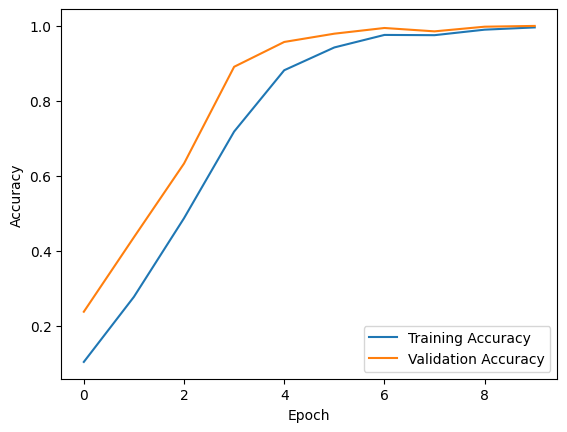

In [21]:
# Paso 5: Mostrar el gráfico de precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 1s 558ms/step


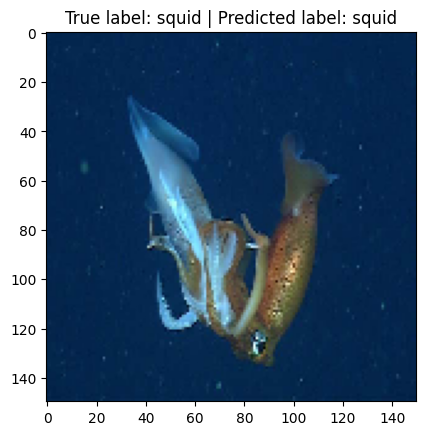

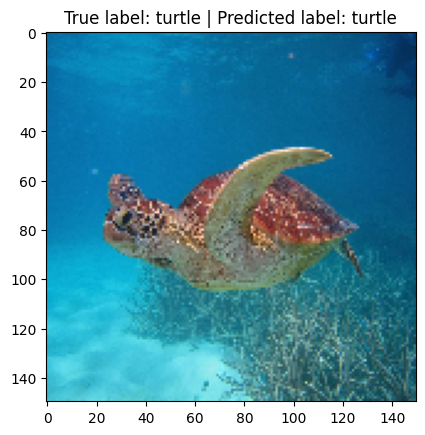

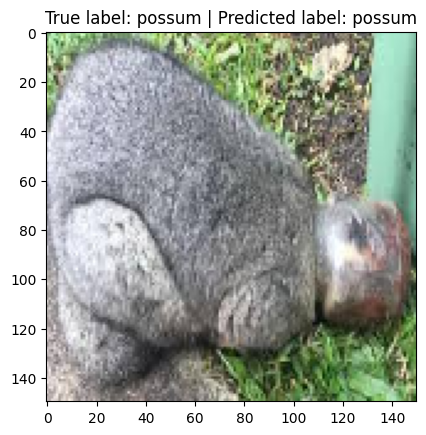

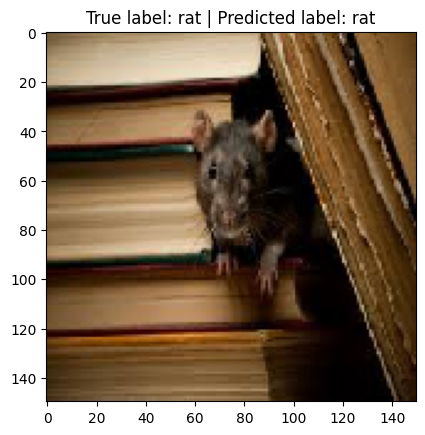

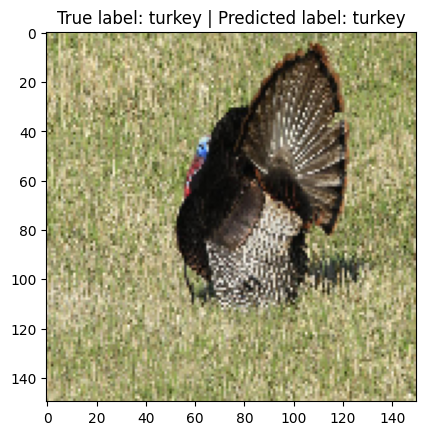

In [22]:
# Paso 6: Mostrar 5 predicciones
class_names = list(train_generator.class_indices.keys())

test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)

for i in range(5):
        plt.imshow(test_images[i])
        plt.title(f"True label: {class_names[test_labels[i].argmax()]} | Predicted label: {class_names[predictions[i].argmax()]}")
        plt.show()